##Contexto

O objetivo deste estudo é explorar o conceito de Análise de Regressão Simples por meio de algumas questões.

##Imports

In [1]:
#install.packages("plm")
#install.packages("ggpubr")
#install.packages("RCurl")
library(readr)
library(ggplot2)
library(ggpubr)
library(plm)
library(RCurl)

#Exercício 1

In [2]:
# Variáveis
X <- c(5.2, 5.1, 4.9, 4.6, 4.7, 4.8, 4.6, 4.9)

(X)

[1] 5.2 5.1 4.9 4.6 4.7 4.8 4.6 4.9

In [3]:
Y <- c(13, 15, 16, 20, 19, 17, 21, 16)

(Y)

[1] 13 15 16 20 19 17 21 16

In [4]:
# Cria dataframe
df <- data.frame(time = X, work = Y)
df

time,work
<dbl>,<dbl>
5.2,13
5.1,15
4.9,16
4.6,20
4.7,19
4.8,17
4.6,21
4.9,16


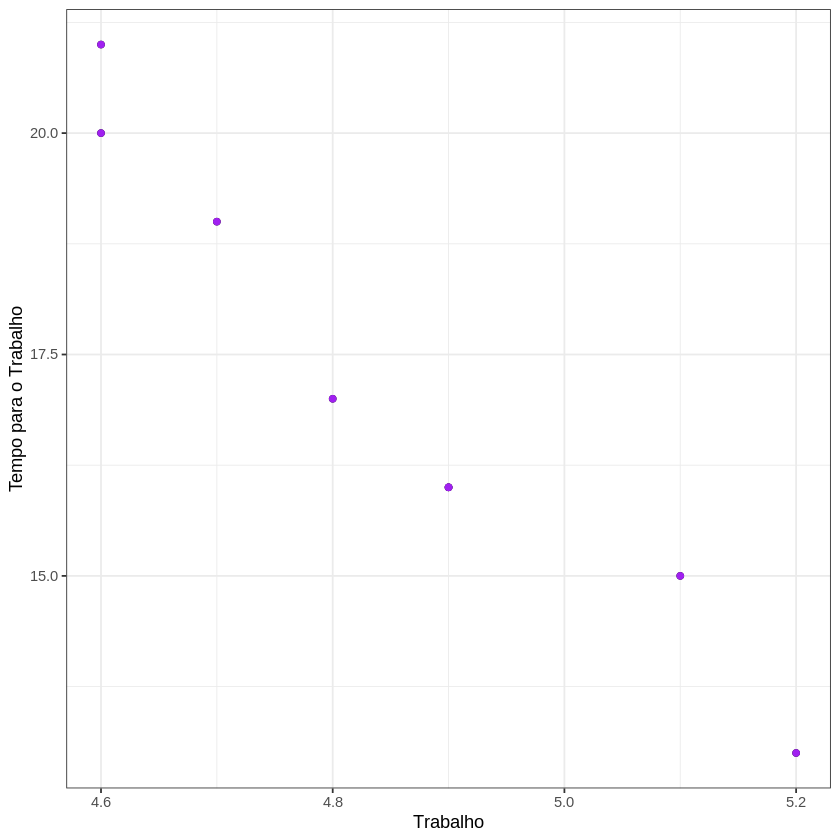

In [5]:
# Gráfico de dispersão
g <- ggplot(data = df, aes(x = time , y = work)) + geom_point()  +
  labs(y = "Tempo para o Trabalho", x = "Trabalho") + geom_point(color = "purple", fill="blue") + theme_bw()

g

In [6]:
# Modelo Linear
mod <- lm(time ~ work, data = df)
mod


Call:
lm(formula = time ~ work, data = df)

Coefficients:
(Intercept)         work  
    6.21327     -0.07961  


In [7]:
# Sumário
summary(mod)


Call:
lm(formula = time ~ work, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05995 -0.03956 -0.01093  0.03084  0.08084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.213268   0.131408   47.28 6.00e-09 ***
work        -0.079607   0.007592  -10.49 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05415 on 6 degrees of freedom
Multiple R-squared:  0.9483,	Adjusted R-squared:  0.9396 
F-statistic:   110 on 1 and 6 DF,  p-value: 4.416e-05


In [8]:
# Coeficiente
coef(mod)

(Intercept)        work 
 6.21326781 -0.07960688

O coeficiente "Work" possui valor de teste (Pr(>|t|)) na região crítica, poranto possuí significância estatística e a rejeição da hipótese nula de que o mesmo seja zero.

Já o coeficiente "Intercept" não possuí significância estatística, portanto não pode ser rejeitada a hipótese nula de que o mesmo seja zero.

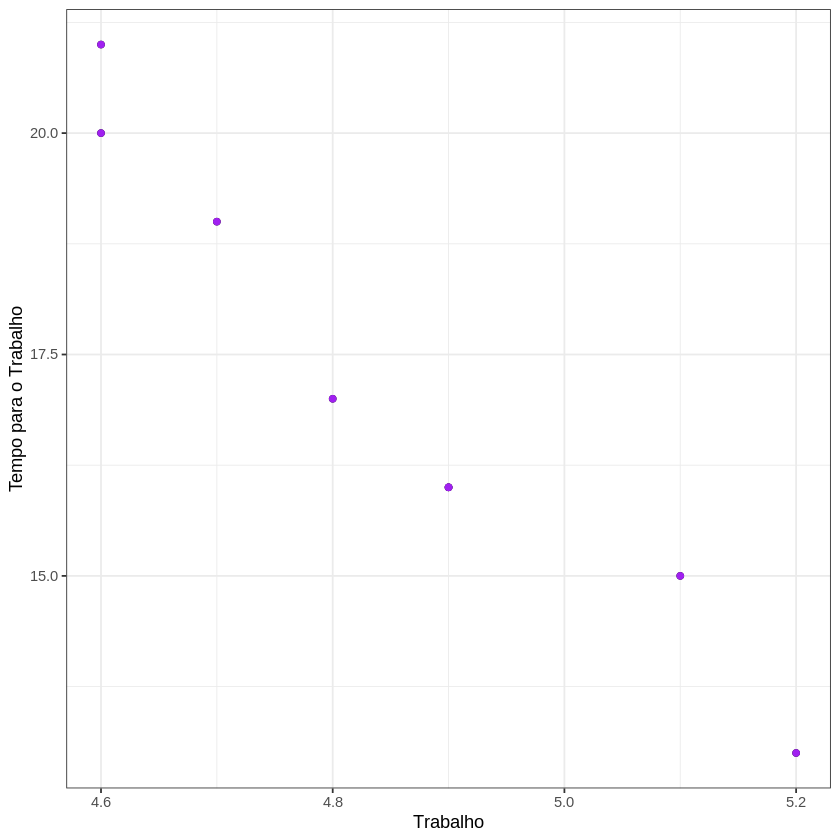

In [9]:
# Gráfico de dispersão
freta <- g + geom_abline(aes(intercept = coef(mod)[1], slope = coef(mod)[2]))

freta

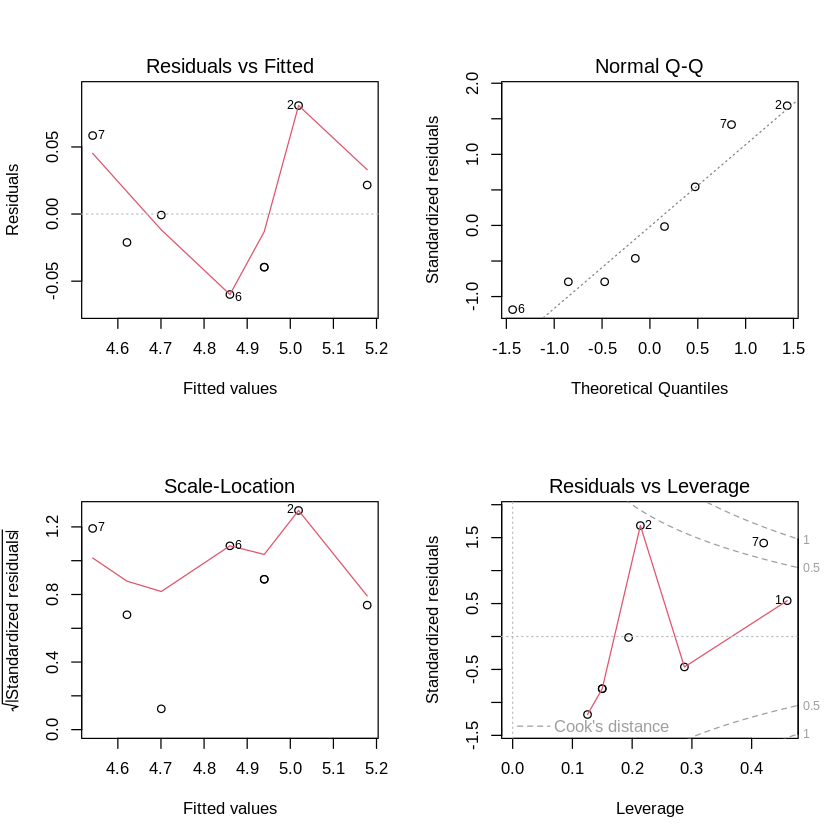

In [10]:
# Plot
par(mfrow=c(2,2))
plot(mod)
text(-.38,-6, "Plot", xpd = NA, cex = 0.8)

#Exercício 2

In [11]:
# Import
df <- read.csv("https://raw.githubusercontent.com/digonfernan/r-regressao-simples-pibgapminder/main/pib_gapminder.csv", header=T,  sep=",") 

head(df)
tail(df)

,pais,ano,pop,continente,expVida,pibPercap
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1,Afghanistan,1952,8425333,Asia,28.801,779.4453
2,Afghanistan,1957,9240934,Asia,30.332,820.8530
3,Afghanistan,1962,10267083,Asia,31.997,853.1007
4,Afghanistan,1967,11537966,Asia,34.020,836.1971
5,Afghanistan,1972,13079460,Asia,36.088,739.9811
6,Afghanistan,1977,14880372,Asia,38.438,786.1134


,pais,ano,pop,continente,expVida,pibPercap
,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
1699,Zimbabwe,1982,7636524,Africa,60.363,788.8550
1700,Zimbabwe,1987,9216418,Africa,62.351,706.1573
1701,Zimbabwe,1992,10704340,Africa,60.377,693.4208
1702,Zimbabwe,1997,11404948,Africa,46.809,792.4500
1703,Zimbabwe,2002,11926563,Africa,39.989,672.0386
1704,Zimbabwe,2007,12311143,Africa,43.487,469.7093


In [12]:
# Sumário
summary(df)

     pais                ano            pop             continente       
 Length:1704        Min.   :1952   Min.   :6.001e+04   Length:1704       
 Class :character   1st Qu.:1966   1st Qu.:2.794e+06   Class :character  
 Mode  :character   Median :1980   Median :7.024e+06   Mode  :character  
                    Mean   :1980   Mean   :2.960e+07                     
                    3rd Qu.:1993   3rd Qu.:1.959e+07                     
                    Max.   :2007   Max.   :1.319e+09                     
    expVida        pibPercap       
 Min.   :23.60   Min.   :   241.2  
 1st Qu.:48.20   1st Qu.:  1202.1  
 Median :60.71   Median :  3531.8  
 Mean   :59.47   Mean   :  7215.3  
 3rd Qu.:70.85   3rd Qu.:  9325.5  
 Max.   :82.60   Max.   :113523.1  

In [13]:
# Estrutura
str(df)

'data.frame':	1704 obs. of  6 variables:
 $ pais      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...


In [14]:
# Classificação de acordo com seu tipo (qualitativa ordinal, nominal, quantitativa discreta, contínua, etc).
print('pais      : chr : Qualitativa Nominal 
       ano       : int : Quantitativa discreta 
       pop       : num : Qualitativa Ordinal 
       continente: chr : Qualitativa Ordinal
       expVida   : num : Quantitativa Continua 
       pibPercap : num : Qualitativa Ordinal')

[1] "pais      : chr : Qualitativa Nominal \n       ano       : int : Quantitativa discreta \n       pop       : num : Qualitativa Ordinal \n       continente: chr : Qualitativa Ordinal\n       expVida   : num : Quantitativa Continua \n       pibPercap : num : Qualitativa Ordinal"


In [15]:
# Tabela de frequência absoluta e tabela de frequência relativa.

table_continente <- table(df$continente)
table_continente


  Africa Americas     Asia   Europe  Oceania 
     624      300      396      360       24 

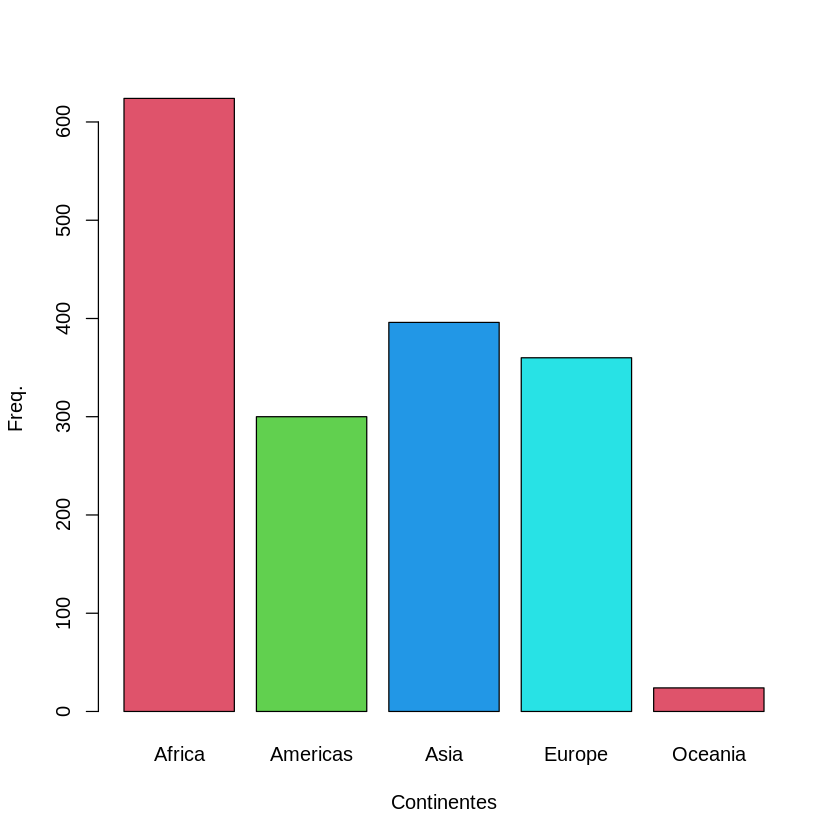

In [16]:
# Gráfico de barras da tabela de frequência absoluta dos continentes.
x<-table_continente
barplot(x, ylab="Freq.", xlab="Continentes", names=c("Africa","Americas","Asia","Europe", "Oceania"), col=2:5)

In [17]:
# Gráfico para relacionar o PIB per capta à expectativa de vida.
names(df)

[1] "pais"       "ano"        "pop"        "continente" "expVida"   
[6] "pibPercap"

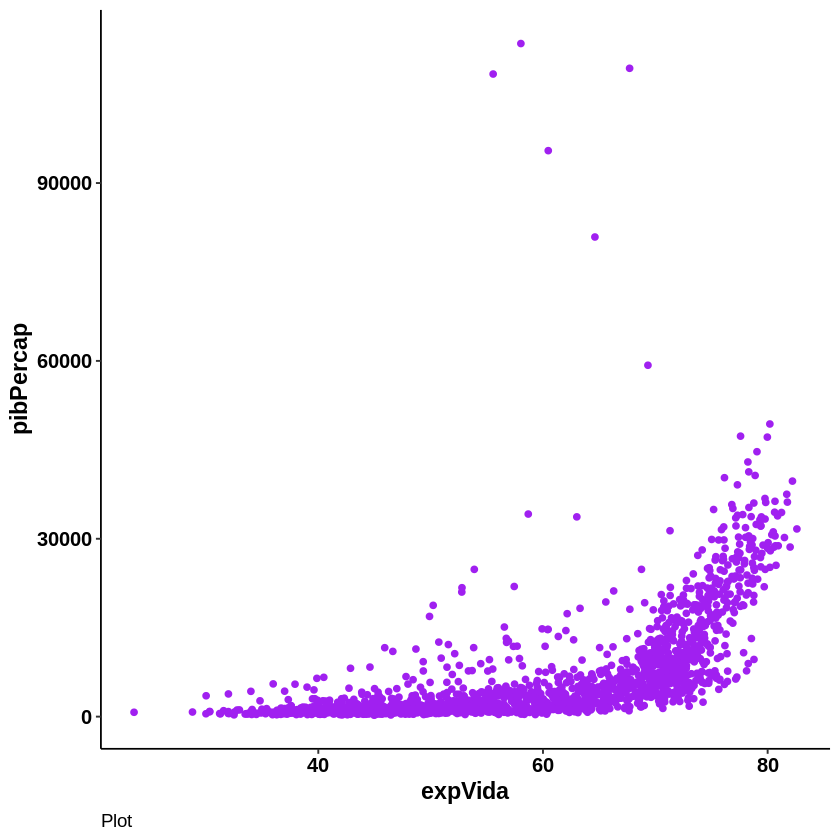

In [18]:
# Gráfico de Dispersão
g_dispersao <- ggplot(data = df, aes(x = expVida, y = pibPercap)) + geom_point(color = "purple", fill="blue") + xlab("expVida") + ylab("pibPercap") + theme_pubr(legend = "right") + labs( caption = "Plot") + labs_pubr() + theme(plot.caption = element_text(hjust = 0))

g_dispersao

In [19]:
# Novas colunas com o logaritmo de PIB per capta e o logaritmo da expectativa de vida. 
print("install.packages(plm)")

lpibPercap <- log(df$pibPercap)
lexpVida <- log(df$expVida)
dados_p2_novo <- df
dados_p2_novo["lpibPercap"] <- lpibPercap
dados_p2_novo["lexpVida"] <- lexpVida
str(dados_p2_novo)

[1] "install.packages(plm)"
'data.frame':	1704 obs. of  8 variables:
 $ pais      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...
 $ lpibPercap: num  6.66 6.71 6.75 6.73 6.61 ...
 $ lexpVida  : num  3.36 3.41 3.47 3.53 3.59 ...


In [20]:
# Gráfico para relacionar estas duas novas variáveis.
names(dados_p2_novo)

[1] "pais"       "ano"        "pop"        "continente" "expVida"   
[6] "pibPercap"  "lpibPercap" "lexpVida"

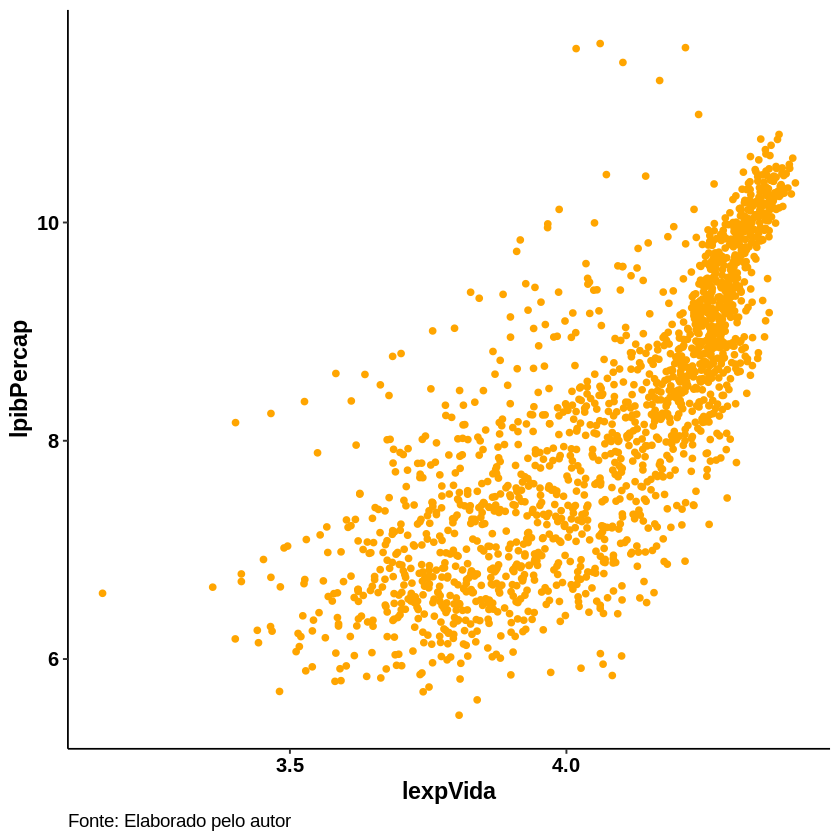

In [21]:
# Gráfico de Dispersão
g_dispersao <- ggplot(data = dados_p2_novo, aes(x = lexpVida, y = lpibPercap)) + geom_point(color = "orange", fill="red") + xlab("lexpVida") + ylab("lpibPercap") + theme_pubr(legend = "right") + labs( caption = "Fonte: Elaborado pelo autor") + labs_pubr() + theme(plot.caption = element_text(hjust = 0))
g_dispersao

#Exercício 3

In [22]:
# Import
rm(df)
dados <- read.csv("https://raw.githubusercontent.com/digonfernan/eda-pib-auto/main/autos.csv", sep=";", header=T)
dados_p3 <- dados # data.frame(scale(dados)) - Padronizacao
str(dados_p3)

'data.frame':	193 obs. of  24 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.doors        : int  2 2 2 4 4 2 4 4 4 2 ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : chr  "88,6" "88,6" "94,5" "99,8" ...
 $ length           : chr  "168,8" "168,8" "171,2" "176,6" ...
 $ width            : chr  "64,1" "64,1" "65,5" "66,2" ...
 $ height           : chr  "48,8" "48,8" "52,4" "54,3" ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.cylinders    : int  4 4 6 4 5 5 5 5 5 4 ...
 $ engine.size      : int  130 130 152 109 136 136 136 136 131 108 ...
 $ fuel.system      

In [23]:
# Sumário
summary(dados_p3)

     make            fuel.type          aspiration          num.doors    
 Length:193         Length:193         Length:193         Min.   :2.000  
 Class :character   Class :character   Class :character   1st Qu.:2.000  
 Mode  :character   Mode  :character   Mode  :character   Median :4.000  
                                                          Mean   :3.161  
                                                          3rd Qu.:4.000  
                                                          Max.   :4.000  
  body.style        drive.wheels       engine.location     wheel.base       
 Length:193         Length:193         Length:193         Length:193        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

In [24]:
X <- dados_p3$horsepower
Y <- dados_p3$price
n <- length(X)

#Função Linear
modelo_reglinear <- lm(Y ~ X, dados_p3)
modelo_reglinear


Call:
lm(formula = Y ~ X, data = dados_p3)

Coefficients:
(Intercept)            X  
    -4630.7        173.1  


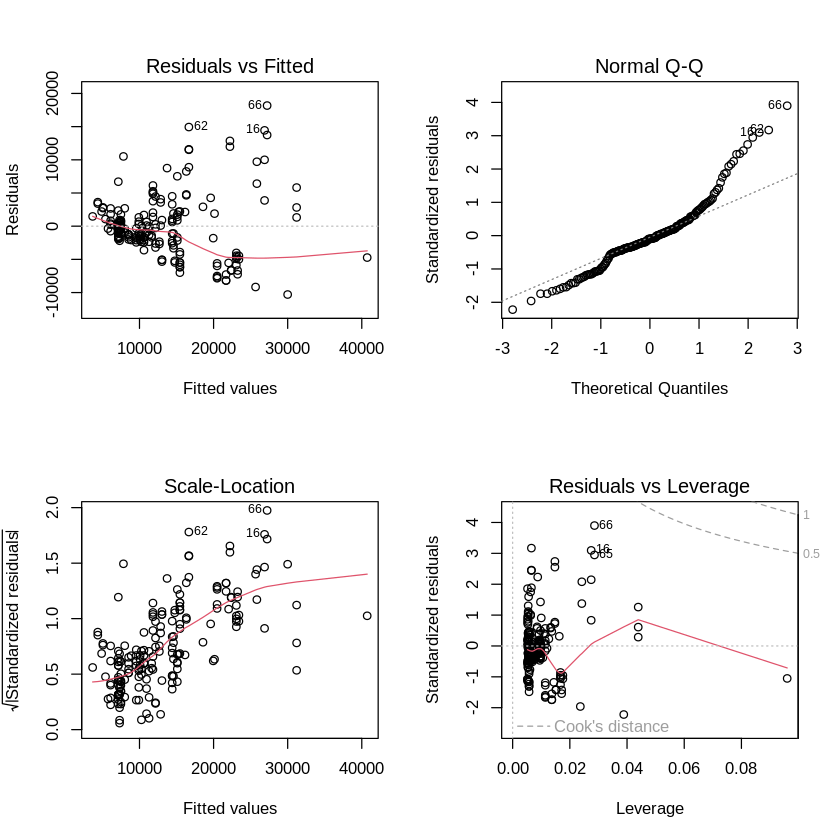

In [25]:
par(mfrow=c(2,2))
plot(modelo_reglinear) 

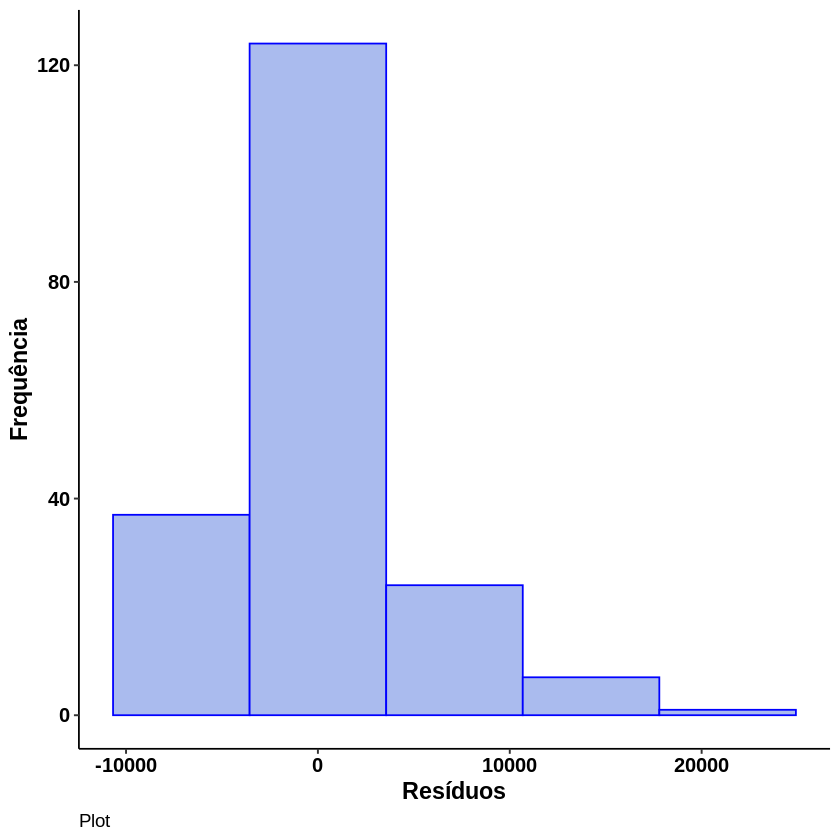

In [26]:
modelo_reglinear.df <- as.data.frame(residuals(modelo_reglinear))
names(modelo_reglinear.df) <- c("residuos")
g <- ggplot(data = modelo_reglinear.df, aes(residuos)) + geom_histogram(fill="#aabbee",color = "blue",stat = "bin", bins = 5) + theme_pubr() + labs_pubr() + xlab("Resíduos") + ylab("Frequência") +  theme(plot.caption = element_text(hjust = 0)) + labs(caption = "Plot" )
g

In [27]:
print("Quanto maior a potência, mais caro é o veiculo.")

[1] "Quanto maior a potência, mais caro é o veiculo."


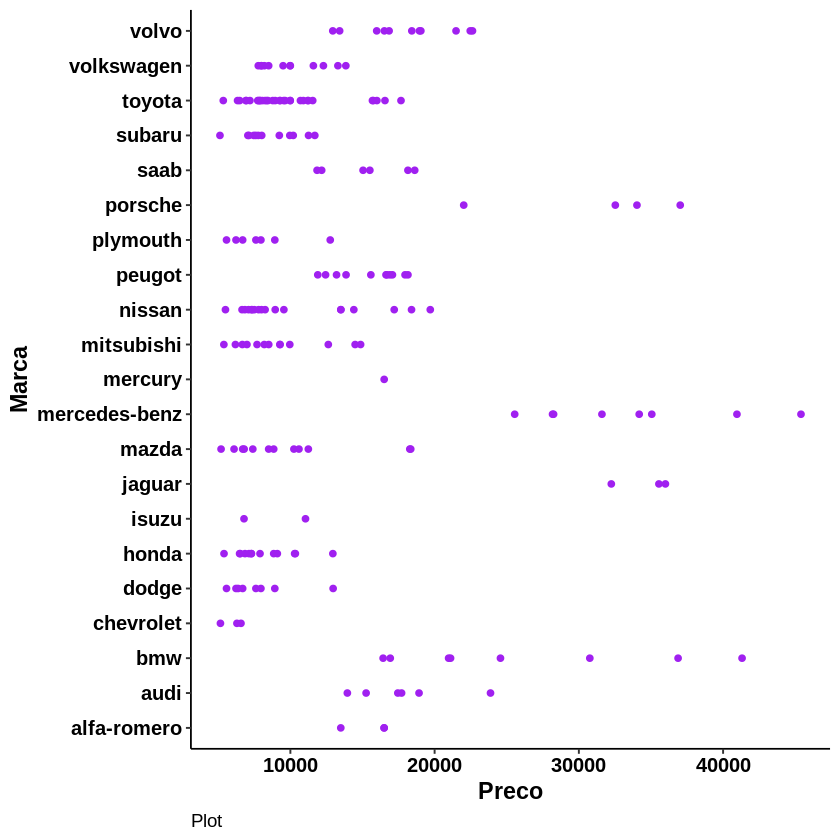

In [28]:
# Gráfico de Dispersão
grafico_dispersao <- ggplot(data = dados_p3, aes(x = price, y = make)) + geom_point(color = "purple", fill="blue") + xlab("Preco") + ylab("Marca") + theme_pubr(legend = "right") + labs( caption = "Plot") + labs_pubr() + theme(plot.caption = element_text(hjust = 0))
grafico_dispersao

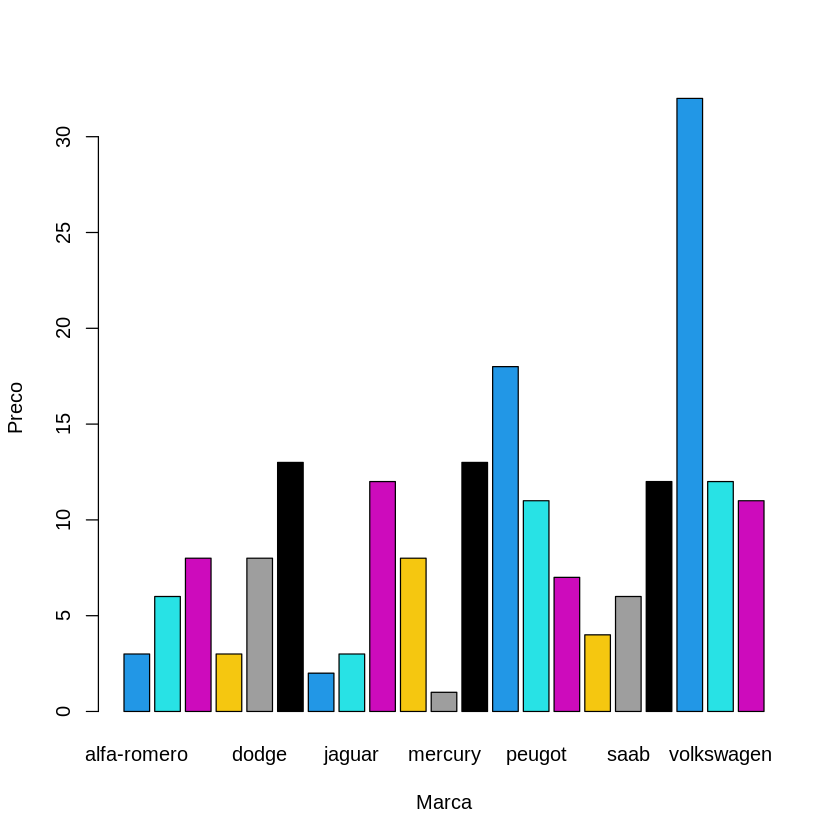

In [29]:
novo_df <- table(dados_p3$make)
x<-novo_df
barplot(x, ylab="Preco", xlab="Marca", col=4:9)

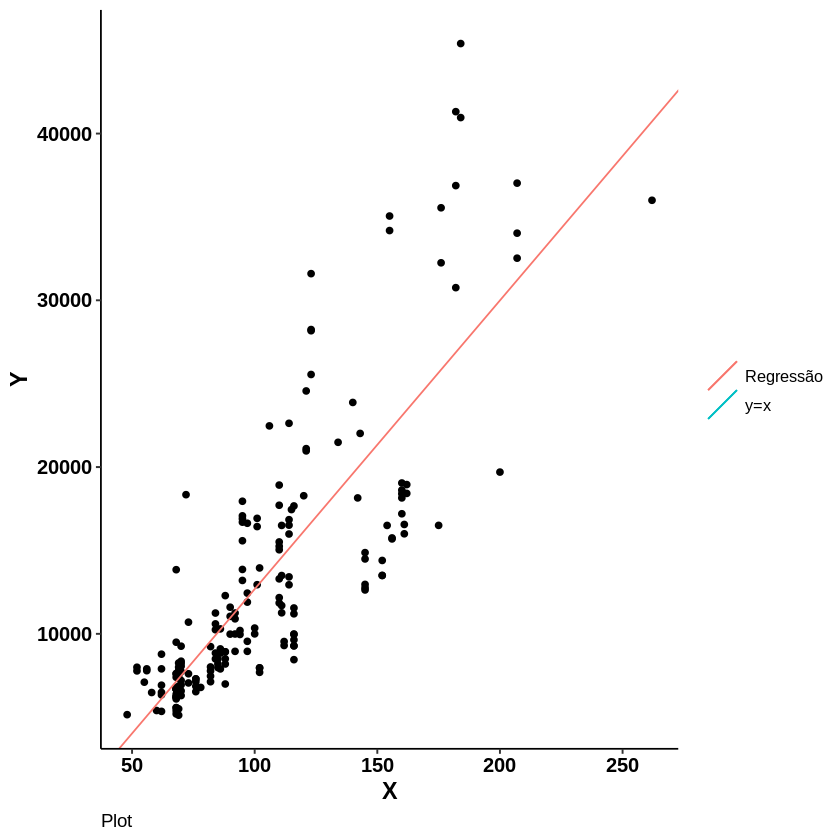

In [30]:
# Analise se apenas a potência de um carro é suficiente para termos uma boa previsão do preço.
modelo_reglinear <- lm(Y ~ X, dados_p3)
modelo_reglinear <- lm(Y ~ X, dados_p3)
cofs <- coefficients(modelo_reglinear)
reta_regressao <- ggplot(data = dados_p3,aes(x = X, y = Y)) + geom_point() + geom_abline( aes(intercept = 0, slope = 1, color = "y=x"), show.legend = TRUE) + geom_abline(aes(intercept = cofs[1], slope = cofs[2], color = "Regressão")) + theme_pubr(legend = "right") + labs_pubr() + labs(color = "") + labs(caption = "Plot") + theme(plot.caption = element_text(hjust = 0))
reta_regressao